# Домашнее задание 1

**Выполнил:** Гриценко Дмитрий Витальевич

**На сколько выполнил:** 10-11 баллов + 22 задание(бонусное с отдельными баллами)

**Правила игры:**

* возле каждой задачи указано число баллов (в сококупности можно получить 10 баллов)

* дополнительные задачи выделены звездочкой (также указано число баллов). Данные баллы можно будет использовать для улучшения результата за любое домашнее задание

* все подсчеты необходимо делать с помощью pandas-numpy (использовать как можно меньше циклов, за использование циклов, где это не требуются, будем штрафовать)

* для визуализации можно использовать matplotlib-seaborn-plotly (учтите, что все графики должны выглядеть опрятно, иметь название-подписи, за нечитабельные графики будем штрафовать)

* возможно, что в данных есть пустоты и невалидные значения. Перед началом любой работы необходимо исследовать, и если такие есть, убрать их

* соблюдайте чистоту кода: переменные должны быть осмысленными, не повторяйтесь, если в этом нет необходимости (иначе используйте функции). Чем чище код - тем проще нам поставить вам хорошую оценку :)

* общая рекомендация: на вопросы со звездочкой отвечать в самом конце, возможно, будет проще)

## Данные 

В этом домашнем задании вам придется оказаться на месте аналитика в бразильском маркетплейсе [Olist](https://olist.com/pt-br/). Вам необходимо исследовать данные и на их основании сделать выводы, которые помогут бизнесу расцветать!

Данные находятся тут: (будет ссылка)

Ван дано 9 датасетов, которые содержат в себе все данные по 100 000 заказам со всей Бразилии. Чтобы облегчить вам жизнь, вот связи по этим датасетам (файл product_category_name_translation является переводом названий категорий с бразильского на английский)

![](https://i.imgur.com/HRhd2Y0.png)

Ну что же, начнем, пожалуй!

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.parser import parse
import dateutil
import matplotlib.pyplot as plt
import pytz
import seaborn as sns

import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse

import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots


In [ ]:
!wget https://github.com/Palladain/Deep_Python/raw/main/Homeworks/Homework_1/archive.zip

--2022-10-11 23:43:05--  https://github.com/Palladain/Deep_Python/raw/main/Homeworks/Homework_1/archive.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Palladain/Deep_Python/main/Homeworks/Homework_1/archive.zip [following]
--2022-10-11 23:43:06--  https://raw.githubusercontent.com/Palladain/Deep_Python/main/Homeworks/Homework_1/archive.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44717580 (43M) [application/zip]
Saving to: ‘archive.zip’

archive.zip         100%[===================>]  42.65M   218MB/s    in 0.2s    

2022-10-11 23:43:07 (218 MB/s) - ‘archive.zip’ saved [44717580/4471

In [ ]:
!unzip archive.zip

Archive:  archive.zip
  inflating: olist_customers_dataset.csv  
  inflating: olist_geolocation_dataset.csv  
  inflating: olist_order_items_dataset.csv  
  inflating: olist_order_payments_dataset.csv  
  inflating: olist_order_reviews_dataset.csv  
  inflating: olist_orders_dataset.csv  
  inflating: olist_products_dataset.csv  
  inflating: olist_sellers_dataset.csv  
  inflating: product_category_name_translation.csv  


In [ ]:
customers = pd.read_csv('olist_customers_dataset.csv') # покупатели
geolocation = pd.read_csv('olist_geolocation_dataset.csv') # местоположение
items = pd.read_csv('olist_order_items_dataset.csv') # 
payments = pd.read_csv('olist_order_payments_dataset.csv') # платежи
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv') # товары
sellers = pd.read_csv('olist_sellers_dataset.csv') # продавцы 
category_name = pd.read_csv('product_category_name_translation.csv')

## Задание 1 (0.4 балла)+

Определите:

* Число товаров
* Среднюю стоимость товара

в разрезе категорий (все категории должны быть на английском языке)

Вообще очень очень странно то, что всего уникальных товаров на португальском 73, но переводов в соответствующем датасете 71. Ниже код подтверждающий это...

In [ ]:
print(f'Число товаров на португальском: {products.product_category_name.nunique()}')
print(f'Перевод с португальского на английский есть для {category_name.product_category_name.nunique()} слова')

Число товаров на португальском: 73
Перевод с португальского на английский есть для 71 слов


In [ ]:
data = products.groupby('product_category_name').agg({'product_id': 'count'}).reset_index()
data = pd.merge(data, category_name, on='product_category_name', how='left')[['product_category_name_english', 'product_id']]
data.dropna()

,product_category_name_english,product_id
0,agro_industry_and_commerce,74
1,food,82
2,food_drink,104
3,art,55
4,arts_and_craftmanship,19
...,...,...
68,signaling_and_security,93
69,tablets_printing_image,9
70,telephony,1134
71,fixed_telephony,116


In [ ]:
# Средняя стоимость товара
ans1 = pd.merge(products, items[['product_id', 'price']], on=["product_id"], how="left").groupby(['product_category_name']).agg({"price": "mean"})
pd.merge(ans1, category_name, on='product_category_name', how='left')[['product_category_name_english', 'price']].dropna()

,product_category_name_english,price
0,agro_industry_and_commerce,342.124858
1,food,57.634137
2,food_drink,54.602446
3,art,115.802105
4,arts_and_craftmanship,75.583750
...,...,...
68,signaling_and_security,108.086583
69,tablets_printing_image,90.703735
70,telephony,71.213978
71,fixed_telephony,225.693182


## Задание 2 (1,5 балла)+

Определите для каждого продавца основную категорию их продаж.

Отобразите категории по числу продавцов, для которых данная категория основная, а также создайте график, по которому можно выбрать отдельно штат и посмотреть такое же распределение



In [ ]:
# ЧАСТЬ 1 (продавец - основная категория)
data = pd.merge(items[['product_id', 'seller_id']], products[['product_id', 'product_category_name']], on=['product_id'], how='left')
data['count'] = 0

data = data.groupby(['seller_id', 'product_category_name']).agg({'count': 'count'}).reset_index()
idx = data.groupby(['seller_id'])['count'].transform(max) == data['count']
data = data[idx].drop_duplicates(['seller_id'])

data = pd.merge(data, sellers[['seller_id', 'seller_state']], on='seller_id', how='left')
data = pd.merge(data, category_name, on='product_category_name', how='left')[[ 'seller_id', 'product_category_name_english', 'count']]
data.sort_values('count')

,seller_id,product_category_name_english,count
1073,5996cddab893a4652a15592fb58ab8db,garden_tools,1
2213,bba8d0c234a52b87b3957037a215d1a4,furniture_decor,1
842,4867209cb29b56b92893d7bde3ce8012,health_beauty,1
841,485452467ff670447e84a8370c3fc898,garden_tools,1
2202,baf15155e37ef5492731459bdc05be8a,bed_bath_table,1
...,...,...,...
2591,da8622b14eb17ae2831f4ac5b9dab84a,bed_bath_table,1277
189,1025f0e2d44d7041d6cf58b6550e0bfa,furniture_decor,1292
867,4a3ca9315b744ce9f8e9374361493884,bed_bath_table,1572
1214,6560211a19b47992c3666cc44a7e94c0,watches_gifts,1628


In [ ]:
# Часть 2 (категория - кол-во продавцов)
data.groupby('product_category_name_english').agg({'seller_id': 'nunique'}).sort_values('product_category_name_english').reset_index().sort_values('seller_id')

,product_category_name_english,seller_id
33,flowers,1
39,furniture_mattress_and_upholstery,1
44,home_comfort_2,1
50,la_cuisine,1
64,tablets_printing_image,1
...,...,...
5,auto,219
37,furniture_decor,223
47,housewares,249
62,sports_leisure,287


In [ ]:
# ЧАСТЬ 3
cols = sellers.seller_state.unique()

fig = go.Figure()

#нарисуем все распределения
for col in cols:

  data = pd.merge(items[['product_id', 'seller_id']], products[['product_id', 'product_category_name']], on=['product_id'], how='left')
  data['count'] = 0

  data = data.groupby(['seller_id', 'product_category_name']).agg({'count': 'count'}).reset_index()  
  data = pd.merge(data, sellers[['seller_id', 'seller_state']], on='seller_id', how='left')
  data = data[data.seller_state == col]
  idx = data.groupby(['seller_id'])['count'].transform(max) == data['count']
  data = data[idx].drop_duplicates(['seller_id'])

  data = data.groupby('product_category_name').agg({'seller_id': 'nunique'}).sort_values('product_category_name').reset_index().sort_values('seller_id')
  fig.add_trace(go.Bar(x=data.product_category_name, y=data.seller_id, visible=True))
    
# Наше меню для отображения
updatemenu= [dict()]

# Кнопки, на которые можно нажимать
buttons=[]

for i, col in enumerate(cols):
    visibles = [False] * len(cols)
    visibles[i] = True
    buttons.append(dict(method='restyle',
                        label=col,
                        args=["visible", visibles]
                        ))
    
updatemenu[0]['buttons']=buttons
updatemenu[0]['direction']='down'
updatemenu[0]['showactive']=True

fig.update_layout(showlegend=False, updatemenus = updatemenu)
go.layout.Updatemenu(x=0, y=1)
fig.update_layout(
    title = {
        "text": "State category",
        "x": 0.5
    })

fig.show()


## Задание 3 (1,5 балл)+

Покажите процент

* суммы покупок в деньгах

* суммы покупок в штуках

по категории для доставленных заказов, а также разбивку по штатам

In [ ]:
# ЧАСТЬ 1 (сумма покупах в деньгах по категории для delivered)

# в data все уникальные order_id и соответствующие им customer_id и state
data = pd.merge(orders[['order_id', 'customer_id', 'order_status']], customers[['customer_id', 'customer_state']], on=["customer_id"], how="left")

# тут все заказы, для одного заказа может быть несколько product_id, для каждого
# product_id его стоимость
data1 = pd.merge(items[['order_id', 'product_id', 'price']], data, on=['order_id'], how='left')

# добавляем для каждого product_id еще название соответствующей категории
data1 = pd.merge(data1, products[['product_id', 'product_category_name']], on='product_id', how='left')

# берем доставленные и группируем по категории, суммируя стоимость каждого заказа
data2 = data1[data1.order_status == 'delivered'].groupby('product_category_name').agg({'price' : 'sum'}).reset_index().sort_values('price')
data2['percent'] = data2.price.apply(lambda x: x / data2['price'].sum() * 100)
data2


,product_category_name,price,percent
67,seguros_e_servicos,283.29,0.002171
37,fashion_roupa_infanto_juvenil,519.95,0.003984
17,cds_dvds_musicais,730.00,0.005594
15,casa_conforto_2,760.27,0.005825
41,flores,1110.04,0.008506
...,...,...,...
44,informatica_acessorios,888724.61,6.809748
32,esporte_lazer,954852.55,7.316445
13,cama_mesa_banho,1023434.76,7.841948
66,relogios_presentes,1166176.98,8.935694


In [ ]:
# ЧАСТЬ 2 (сумма покупок в штуках)

# в data все возможные уникальные order_id и соответствующие им customer_id и state
data = pd.merge(orders[['order_id', 'customer_id', 'order_status']], customers[['customer_id', 'customer_state']], on=["customer_id"], how="left")

# тут все заказы, для одного заказа может быть несколько product_id, для каждого
# product_id его стоимость
data1 = pd.merge(items[['order_id', 'product_id', 'price']], data, on=['order_id'], how='left')

# добавляем для каждого product_id еще название соответствующей категории
data1 = pd.merge(data1, products[['product_id', 'product_category_name']], on='product_id', how='left')

# берем доставленные и группируем по категории, суммируя стоимость каждого заказа
data2 = data1[data1.order_status == 'delivered'].groupby('product_category_name').agg({'price' : 'count'}).reset_index().sort_values('price')
data2['percent'] = data2.price.apply(lambda x: x / data2['price'].sum() * 100)
data2

,product_category_name,price,percent
14,casa_conforto,429,0.394809
57,moveis_sala,495,0.455549
1,alimentos,499,0.459231
48,livros_interesse_geral,537,0.494202
16,casa_construcao,596,0.548500
45,instrumentos_musicais,651,0.599117
31,eletroportateis,658,0.605559
28,eletrodomesticos,754,0.693908
21,construcao_ferramentas_construcao,916,0.842997
50,malas_acessorios,1077,0.991165


In [ ]:
# Часть 3 (штат - процент суммы этого штата относительно всей суммы)
data = pd.merge(orders[['order_id', 'customer_id', 'order_status']], customers[['customer_id', 'customer_state']], on=["customer_id"], how="left")

data1 = pd.merge(items[['order_id', 'product_id', 'price']], data, on=['order_id'], how='left')

data1 = pd.merge(data1, products[['product_id', 'product_category_name']], on='product_id', how='left')
data2 = data1[data1.order_status == 'delivered'].groupby('customer_state').agg({'price' : 'sum'}).reset_index().sort_values('price')
data2['percent'] = data2.price.apply(lambda x: x / data2['price'].sum() * 100)
data2

,customer_state,price,percent
21,RR,7057.47,0.053379
3,AP,13374.81,0.101160
0,AC,15930.97,0.120493
2,AM,22155.84,0.167574
20,RO,45682.76,0.345519
26,TO,48402.51,0.366089
24,SE,56574.19,0.427895
1,AL,78855.72,0.596420
19,RN,82105.66,0.621001
16,PI,84721.00,0.640782


## Задание 4 (0.6 балла)+

Визуализируйте зависимость между средним числом покупок и:

* числом фотографий товара

* кол-во символов в описании товара (аггрегируйте с шагом 20)

* кол-во символов в названии (аггрегируйте с шагом 5)

**Тут блоки кода нужно запускать последовательно, так как каждый последующий использует предыдущие**

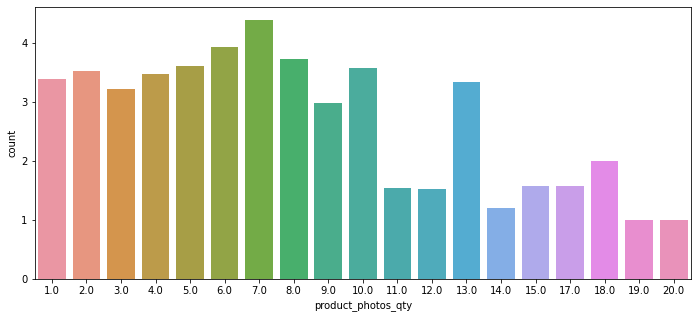

In [ ]:
# Часть 1
# Логично рассматривать доставленные товары и те, у которых не стоит нигде NaN
data = pd.merge(items[['order_id', 'product_id']], orders[['order_id', 'order_status']], on='order_id', how='left')
data = data[data.order_status == 'delivered'].groupby('product_id').agg({'order_id': 'count'}).rename(columns={"order_id": "count"}).reset_index()
data = data.dropna()


data1 = pd.merge(data, products[['product_id', 'product_photos_qty']], on='product_id', how='left')
plt.figure(figsize=(40, 5))
plt.subplot(131)
sns.barplot(data=data1.groupby('product_photos_qty').agg({'count': 'mean'}).reset_index(), x="product_photos_qty", y="count")
plt.show()


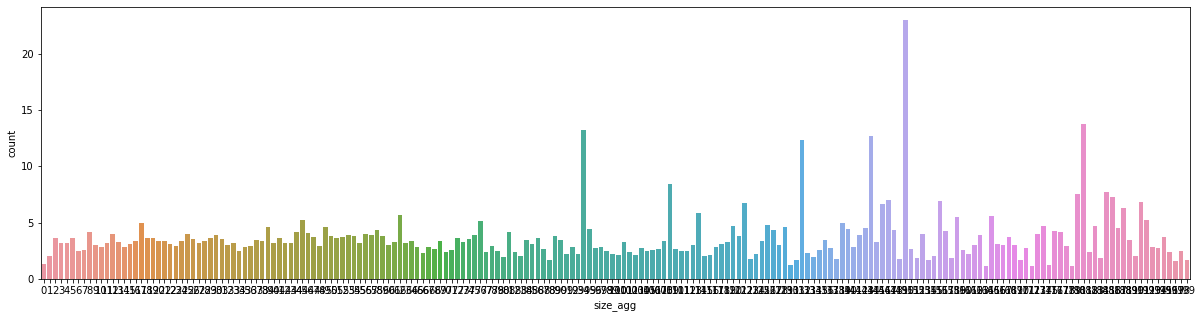

In [ ]:
# Часть 2
plt.figure(figsize=(70, 5))
data2 = pd.merge(data, products[['product_id', 'product_description_lenght']], on='product_id', how='left')
data2['size_agg'] = int(0)
data2 = data2.dropna()
data2.size_agg = data2.product_description_lenght.apply(lambda x: x // 20);
data2.size_agg = data2.size_agg.apply(int)

plt.subplot(132)
sns.barplot(data=data2.groupby('size_agg').agg({'count': 'mean'}).reset_index(), x="size_agg", y="count")
plt.show()

Как видим при агрегации по $20$ с помощью столбчатой диаграммы, максимально сложно исследовать график, попробуем линейный график


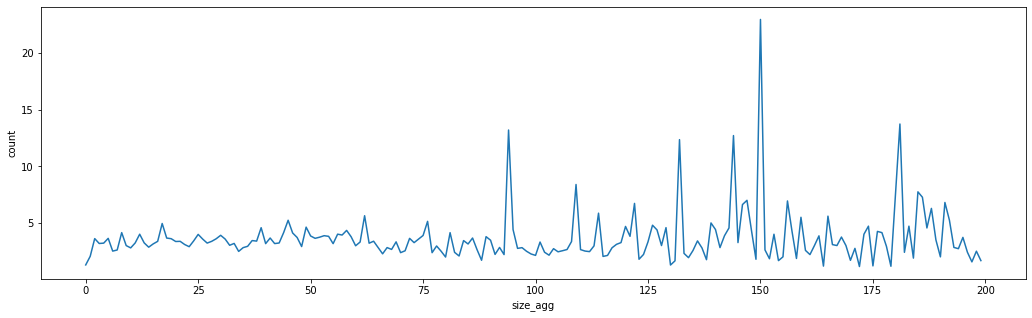

In [ ]:
# линейный график
plt.figure(figsize=(60, 5))
plt.subplot(131)
sns.lineplot(data=data2.groupby('size_agg').agg({'count': 'mean'}).reset_index(), x="size_agg", y="count")

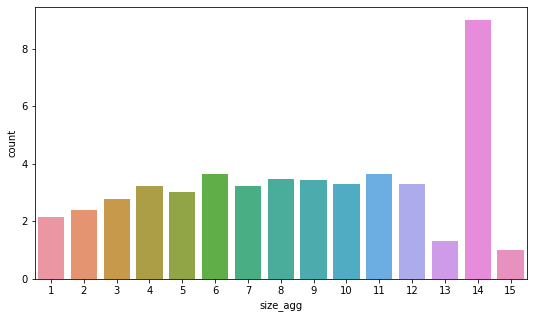

In [ ]:
# Часть 3 
plt.figure(figsize=(30, 5))
data3 = pd.merge(data, products[['product_id', 'product_name_lenght']], on='product_id', how='left')
data3['size_agg'] = int(0)
data3 = data3.dropna()
data3.size_agg = data3.product_name_lenght.apply(lambda x: x // 5);
data3.size_agg = data3.size_agg.apply(int)

plt.subplot(132)
sns.barplot(data=data3.groupby('size_agg').agg({'count': 'mean'}).reset_index(), x="size_agg", y="count")
plt.show()

## Задание 5* (1 балл)+

Имея полученные данные по товарам, чекам и категориям, а также сделав дополнительные расчеты (если необходимо), предположите:

1. Продавцов каких категорий необходимо привлекать в маркетплейс?

2. Какие категории в каких штатах необходимо развивать?

3. Развитие каких категорий не принесут большого эффекта и почему?

4. Какие рекомендации можно дать для продавцов, чтобы их товар лучше продавался?

**Ответ:**
1. Я бы привлекал продавцов таких категорий, которые не являются самыми продаваемыми, но все же приносят хорошие суммы в капитал и пользуются спросом среди покупаетелей, но при этом у этих категорий не должно быть много продавцов. Это такие категории, как pet_shop, fashion_bags_accessories, stationery,electronics, baby, perfumery, cool_stuff, toys, garden_tools, telephony, bab,
2. Логично, что для штатов, у которых плохо продается та или иная категория, в то время как в нескольких других штатах она же продается намного лучше, не будет возможности конкурировать. Поэтому у них есть хорошая возможность развивать те категории, которые не развиты у топ штатов. Такой шаблон действий подходит штатам RS, MG, RN, MT, CE, PB, AC, ES, RO, PI, MS, SE, MA, AM, PA. Для других штатов я бы советовал во-первых рискнуть вложиться в категории, которые очень слабо продаются и их развить, во-вторых укреплять позиции для товаров со средним кол-вом продаж, чтобы все категории продавались примерно в одном количестве.
3. Я бы не стал развивать security_and_services, fashion_childrens_clothes, pc_gamer, la_cuisine, cds_dvds_musicals. На эти и многие другие категории нет спроса, они продаются очень слабо. Хотя в долгосрочной дисциплине я бы выбрал некоторые категории из таких не столь популярных и пытался бы их поднять до уровня середины.
4. Рекомендации.\
  4.1 Самым оптимальным количеством фотографий товара будет 5-8.\
  4.2 Название товара сильным образом не влияет(возможно это связано с тем, что многие воспринимают название как описание товара\
  4.3 А вот в описании товара стоит использовать примерно 2000 - 3000 символов\
  4.4 Как бы не было предсказуемо, но продавать из штатов MG, RJ, SP(они самые прибыльные)

## Задание 6 (0.5 балла)+

Определите средний чек покупки (добавьте разбивку на стоимость самого заказ и стоимость доставки) и среднее число товаров в заказе

In [ ]:
# Рассматриваем только оплаченные покупки(delivered).
data = pd.merge(items[['order_id', 'price', 'freight_value']], orders[['order_id', 'order_status']], on='order_id', how='left')
data['counts'] = 0

data = data[data.order_status == 'delivered'].groupby('order_id').agg({'price': 'sum', 'freight_value': 'sum', 'counts': 'count'})
data['final_value'] = 0
data.final_value = data[['price', 'freight_value']].apply(lambda x: x[0] + x[1], axis=1)
data.sort_values('counts')


,price,freight_value,counts,final_value
order_id,,,,
00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,1,72.19
a6d306fdfa4582a936be85949cf98a50,99.99,23.50,1,123.49
a6d26cc151cf55506e5fa88970b09edf,150.00,9.86,1,159.86
a6d23aa5f1190c09129345b363de8e37,36.50,17.93,1,54.43
a6d1a3603743294fba96635ebe821f46,269.99,22.54,1,292.53
...,...,...,...,...
428a2f660dc84138d969ccd69a0ab6d5,982.35,243.30,15,1225.65
9ef13efd6949e4573a18964dd1bbe7f5,765.00,18.00,15,783.00
1b15974a0141d54e36626dca3fdc731a,2000.00,202.40,20,2202.40


In [ ]:
print("Средний чек покупки", data.final_value.mean())


Средний чек покупки 159.82683876116832


In [ ]:
print("Среднее число товаров в заказе", data.counts.mean())

Среднее число товаров в заказе 1.1421982213561641


## Задание 7 (0.2 балла)+

Определите среднее число покупок на пользователя (обратите внимание на идентификаторы)

In [ ]:
# Не очень понятное условие. Если под покупкой понимается каждый product_id в заказе, то нужно найти среднее для каждого пользователя :

data = pd.merge(orders[['order_id', 'customer_id', 'order_status']], customers[['customer_id', 'customer_unique_id']], on='customer_id', how='left')
data1 = items.groupby('order_id').agg({'product_id': 'count'}).reset_index().rename(columns={"product_id": "pays"})
data2 = pd.merge(data, data1, on='order_id', how='left').sort_values('pays')
data2[data2.order_status == 'delivered'].groupby('customer_unique_id').agg({'pays': 'mean'}).reset_index().sort_values('pays')


,customer_unique_id,pays
0,0000366f3b9a7992bf8c76cfdf3221e2,1.0
60518,a5c325fd2fff2e6dd34c33d2baf49b9e,1.0
60517,a5c30a5645d62469cf66c50953f84ad7,1.0
60515,a5c1bc60f6c90827fa62199f3fd04031,1.0
60514,a5c133a6a95d06f06939fd961fb8a0c3,1.0
...,...,...
90465,f7ea4eef770a388bd5b225acfc546604,14.0
6612,11f97da02237a49c8e783dfda6f50e8e,15.0
38579,698e1cf81d01a3d389d96145f7fa6df8,20.0
71566,c402f431464c72e27330a67f7b94d4fb,20.0


In [ ]:
# Если же под одной покупкой понимается весь заказ, то надо найти среднее для всех пользователей:
data = pd.merge(orders[['order_id', 'customer_id', 'order_status']], customers[['customer_id', 'customer_unique_id']], on='customer_id', how='left')
print(data[data.order_status == 'delivered'].groupby('customer_unique_id').agg({'order_id' : 'count'}).reset_index().order_id.mean())

1.0334197390689603


Среднее число покупок на пользователя $1.0334197390689603$

## Задание 8 (0.2 балла)+

Отобразите среднюю сумму оплаты по типу оплаты

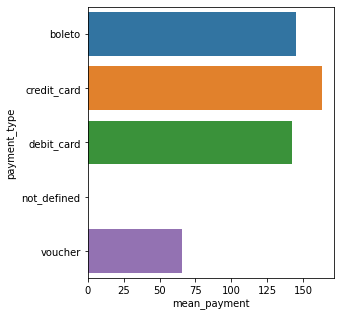

In [ ]:
# брал просто среднюю сумму по типу оплаты. Можно было попробовать еще все платежи одного заказа суммировать и от таких значений брать среднее(т.е. после группировки по
# payment_type еще сгруппировать по order_id), но все же кажется, что просят первое
plt.figure(figsize=(15, 5))
plt.subplot(133)
sns.barplot(data=payments.groupby("payment_type") \
    .agg({"payment_value": "mean"}) \
    .reset_index() \
    .rename(columns={"payment_value": "mean_payment"}) \
    , x="mean_payment", y="payment_type")
plt.show()


## Задание 9 (0.4 балла)+

Обратите внимание на число платежей (payment_installments). Выясните, какая сумма оплаты указана: за целую покупку или только за ее часть?

Также покажите средний чек в зависимости от числа оплаты. Есть ли какая-то связь между ними?

In [ ]:
max_types = payments.groupby('order_id').agg({'payment_type': 'nunique'}).reset_index().payment_type.max()
print(f'В каждом заказе присутствует не более {max_types} различных типов оплаты')

В каждом заказе присутствует не более 2 различных типов оплаты


Рассмотрим такой заказ, чтобы сразу дать ответ на первый вопрос

In [ ]:
data = items[items.order_id == '895ab968e7bb0d5659d16cd74cd1650c']
print(f'Стоимость заказа с доставкой: {sum(data.price) + sum(data.freight_value)}')

стоимость заказа с доставкой: 161.32


In [ ]:
data = payments.copy(deep=True)
data = data[data.order_id == '895ab968e7bb0d5659d16cd74cd1650c']
print(f'Стоимость заказа с доставкой: {sum(data.payment_value)}') # упс во время сложения мини погрешность возникла

Стоимость заказа с доставкой: 161.32000000000002


Заметим, что суммы совпали, значит, указана не полная стоимость заказа, а только части, потому что часть гасится через тип оплаты voucher(это нормально, так как на то и рассчитан voucher). Важное замечание каждый voucher гасится за 1 период(payment_installments)\


In [ ]:
data = payments.copy(deep=True)
data = data[(data.payment_installments != 0)]
data = data.groupby('payment_installments').agg({'payment_value': 'mean'}).reset_index()
data

,payment_installments,payment_value
0,1,112.420229
1,2,127.228150
2,3,142.539317
3,4,163.976840
4,5,183.465222
5,6,209.849952
6,7,187.673672
7,8,307.737427
8,9,203.440870
9,10,415.085837


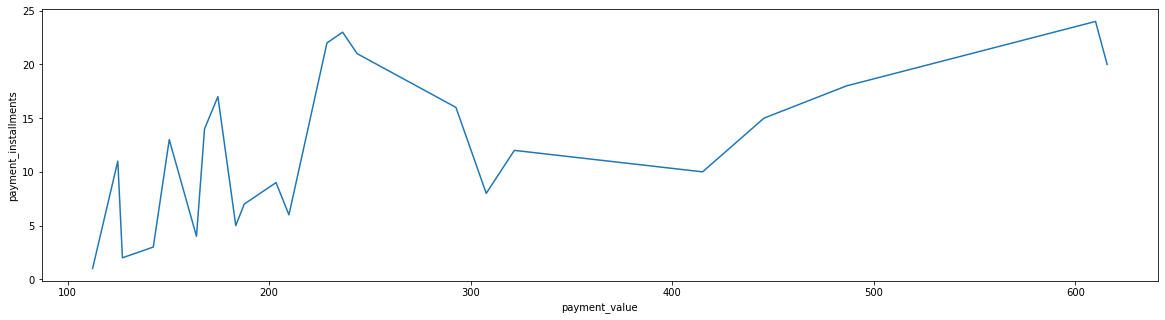

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(data=data, x='payment_value', y='payment_installments')
plt.show()

И вправду чем больше сумма заказа тем больше периодов в заказе. Кажется, что это логично и имеет отражение в нашей жизни

## Задание 10 (0.4 балла)+

Визуализируйте зависимость между ценой заказа и ценой доставки по штатам покупки. Есть ли какая-нибудь зависимость и как вы можете ее обосновать?

In [ ]:
cols = customers.customer_state.unique()

fig = go.Figure()

#нарисуем все распределения
for col in cols:
  data = items.groupby('order_id').agg({'price': 'sum', 'freight_value': 'sum'}).reset_index()
  data = pd.merge(data, orders[['order_id','customer_id', 'order_status']], on='order_id', how='left')
  data = pd.merge(data, customers[['customer_id', 'customer_state']], on='customer_id', how='left') 
  data = data[data.order_status == 'delivered']
  data = data[data.customer_state == col]
  data['final_sum'] = 0
  data.final_sum = data[['price', 'freight_value']].apply(lambda x: x[0] + x[1], axis=1)
  data = data.sort_values('final_sum')
  fig.add_trace(go.Scatter(x=data.final_sum, y=data.freight_value, visible=True))
    
# Наше меню для отображения
updatemenu= [dict()]

# Кнопки, на которые можно нажимать
buttons=[]

for i, col in enumerate(cols):
    visibles = [False] * len(cols)
    visibles[i] = True
    buttons.append(dict(method='restyle',
                        label=col,
                        args=["visible", visibles]
                        ))
    
updatemenu[0]['buttons']=buttons
updatemenu[0]['direction']='down'
updatemenu[0]['showactive']=True

fig.update_layout(showlegend=False, updatemenus = updatemenu)
go.layout.Updatemenu(x=0, y=1)
fig.update_layout(
    title = {
        "text": "Price of order and freight_value",
        "x": 0.5
    })

fig.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Проанализировав графики для каждого из штатов, можно сказать, что по большей части доставка примерно в одном диапазоне, но при росте общей цены покупки, часто "пробивается максимум" стоимости доставки. На графике это отображено частыми скачками графика при $x > 500$. Т.е. при $x < 500$ доставка более менее фиксирована и колеблется в определенных значениях, а дальше уже хаотично может как подскочить, так и остаться в среднем диапазоне

## Задание 11 (0.4 балла)+

Выведите график по числу покупок (в разбивке по статусам) и временем покупки (аггрегируйте покупки до дня)

In [ ]:
data = orders.copy(deep=True)
data['order_date'] = ''
data.order_date = data['order_purchase_timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d  %H:%M:%S').date())
data = data[['order_id', 'order_status', 'order_date']]

cols = orders.order_status.unique()
fig = go.Figure()

for col in cols:
  data1 = data[data.order_status == col].groupby('order_date').agg({'order_id': 'count'}).reset_index()
  fig.add_trace(go.Bar(x=data1.order_date, y=data1.order_id, visible=True))
    
updatemenu= [dict()]

buttons=[]

for i, col in enumerate(cols):
    visibles = [False] * len(cols)
    visibles[i] = True
    buttons.append(dict(method='restyle',
                        label=col,
                        args=["visible", visibles]
                        ))
    
updatemenu[0]['buttons']=buttons
updatemenu[0]['direction']='down'
updatemenu[0]['showactive']=True

fig.update_layout(showlegend=False, updatemenus = updatemenu)
go.layout.Updatemenu(x=0, y=1)
fig.update_layout(
    title = {
        "text": "number of goods and time of payment",
        "x": 0.5
    })
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)
fig.show()



## Задание 12* (1 балл)+

Используя полученные данные, а также сделав дополнительные вычисления (если необходимо), предположите:

1. Есть ли сезонность в покупках на маркетплейсе?

2. Есть ли какие-то необъяснимые падение/рост продаж? С чем это может быть связано?

**Ответ**
1. Трудно говорить о сезонности в период год, но все же стоит заметить, что продажи с января по май 2018 года держались на достаточно высоком уровне, потом заметно упали. Но вообще очень странно, что распределение в 2017 году намного хуже, единственное объяснение - это повышение популярности маркетплейса.

2. К примеру есть необъяснимый рост, 24-го ноября 2017 года, сложно точно сказать с чем это связано, но все же попробую предположить, что это может быть связано с политикой, экономикой, спортом и т.п. Узнал, что 21-го ноября 2017 года был подписан закон об имиграции, возможно он стал причиной

## Задание 13 (0.3 балла)+

Посчитайте CSAT (customer satisfaction - средняя оценка ревью) и отобразите средний CSAT по дням



In [ ]:
data = reviews.copy(deep=True)
data['review_date'] = ''
data.review_date = data['review_creation_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d  %H:%M:%S').date())
data = data[['review_score', 'review_date']]

fig = go.Figure()
data = data.groupby('review_date').agg({'review_score': 'mean'}).reset_index()
fig.add_trace(go.Bar(x=data.review_date, y=data.review_score, visible=True))
    


fig.update_layout(showlegend=False)
go.layout.Updatemenu(x=0, y=1)
fig.update_layout(
    title = {
        "text": "CSAT and days",
        "x": 0.5
    })
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)
fig.show()

## Задание 14 (0.3 балла)+

Найдите топ-5 лучших и топ-5 худших продавцов по средней оценке и посчитайте их число продаж

In [ ]:
# Опять же рассматриваем только доставленные товары
items.head(5)
data = pd.merge(items[['order_id', 'seller_id']], reviews[['order_id', 'review_score']], on='order_id', how='left')
data = pd.merge(data, orders[['order_id', 'order_status']], on='order_id', how='left')
data = data[data.order_status == 'delivered'].dropna()

data = data.groupby('seller_id').agg({'review_score': 'mean'}).reset_index().sort_values('review_score')
top5_up, top5_down = data.head(5), data.tail(5)

def f(x):
  data1 = pd.merge(items[['order_id', 'seller_id']], orders[['order_id', 'order_status']], on='order_id', how='left')
  data1 = data1[data1.order_status == 'delivered']
  return data1[data1.seller_id == x].count()['seller_id']

top5_up['count'] = top5_up['seller_id'].apply(lambda x: f(x))
top5_down['count'] = top5_down['seller_id'].apply(lambda x: f(x))


# для удобства запихнул в один датафрейм

pd.concat([top5_up, pd.DataFrame([['---', '----', '----']],
                   columns=['seller_id', 'review_score', 'count']), top5_down])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,seller_id,review_score,count
1153,61c36f0fc4a47f9532e5512b66668e62,1.0,1
2221,c004e5ea15737026cecaee0447e00b75,1.0,2
2112,b7ba853e9551f4558440881fd3e5c815,1.0,2
380,20d53aad4fe5ee93a64f8839609d3586,1.0,2
1278,6d04126aba80df143fd038e711b8fd96,1.0,1
0,---,----,----
1864,9fbd5666d8618fa571c4230fafa09bd6,5.0,1
1866,9fe7c6641c79970ab48185498f547c09,5.0,1
1872,a08692680c77d30a0b4280da5df01c5a,5.0,17
1753,9558aa23f77a9e0a0eca83540999f43b,5.0,2


## Задание 15 (0.3 балла)

Посмотрите, как быстро отвечают пользователи (сделайте аггреграцию по дням) и влияет ли это на оценку?

## Задание 16 (0.5 балла)+

Отобразите распределение оценок для заказов, которые были доставлены вовремя и которые пришли с опозданием. Насколько влияет факт опоздания на оценку?

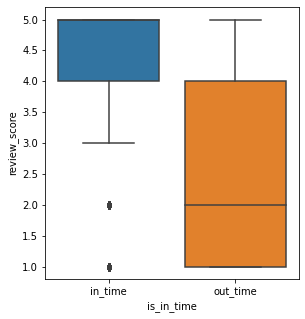

In [ ]:
data = orders[orders.order_status == 'delivered'][['order_id', 'order_delivered_customer_date', 'order_estimated_delivery_date']]
data = pd.merge(data, reviews[['order_id', 'review_score']], on='order_id', how='left')
data['is_in_time'] = data.order_delivered_customer_date < data.order_estimated_delivery_date;
data['is_in_time'] = data.is_in_time.apply(lambda x: 'in_time' if x else 'out_time')
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.boxplot(data=data, x='is_in_time', y='review_score')

Как видим, оценка очень сильно зависит от опаздания, верхняя граница распределение опаздания в среднем лежит на том же уровне, что и нижняя граница для вовремя доставленных



## Задание 17* (1,5 балла)+

Есть ли среди пользователей хейтеры? Определите их и вычислите средний CSAT без их участия

Определим понятие хейтер. Исходя из 16 задания мы поняли, что оценки заказов доставленных вовремя на порядок выше доставленных с опазданием, т.е. заказы доставленные вовремя имели оценки 4, 5, за исключением некоторых, в то время как заказы доставленные невовремя имели 1, 2, 3.\
**Значит, первый признак хейтера, это низкая оценка(3 и ниже) за заказ без опаздания.**
Но заказ могли привести в плохом состоянии, за что могла быть поставлена плохая оценка, даже если товар пришел вовремя. Поэтому тут есть смысл воспользоваться заданием 14. Если средняя оценка данного продавца низкая и пользователь ставит низкую оценку, то это еще не повод записывать его в хейтеры\
**Значит, второй признак хейтера - это низкая оценка продавцу(2 и ниже), у которого средняя оценка достаточно высокая(4.5 и более).**


In [ ]:
data = orders[orders.order_status == 'delivered'][['order_id', 'customer_id', 'order_delivered_customer_date', 'order_estimated_delivery_date']]
data = pd.merge(data, reviews[['order_id', 'review_score']], on='order_id', how='left')
data['in_time'] = data.order_delivered_customer_date < data.order_estimated_delivery_date;

data = data[data['review_score'].isin([0, 1, 2, 3])]

potential_haters1 = data[data.in_time == True].sort_values('review_score')
potential_haters1['check1'] = True
potential_haters1 = potential_haters1[['customer_id', 'check1']]

potential_haters1 = potential_haters1.groupby('customer_id').agg({'check1': lambda x: True}).reset_index()
# _________________

data = pd.merge(items[['order_id', 'seller_id']], reviews[['order_id', 'review_score']], on='order_id', how='left')
data = pd.merge(data, orders[['order_id', 'order_status']], on='order_id', how='left')
data = data[data.order_status == 'delivered'].dropna()

data = data.groupby('seller_id').agg({'review_score': 'mean'}).reset_index().sort_values('review_score')
data = data.query('review_score >= 4.5')
data = pd.merge(items[['order_id', 'seller_id']], data, on='seller_id', how='left').dropna()
data = pd.merge(data, orders[orders.order_status=='delivered'][['order_id', 'customer_id']], on='order_id', how='left').dropna()
data = pd.merge(data, reviews[['order_id', 'review_score']], on='order_id', how='left').dropna()
data = data.query('review_score_y <= 2.0')
data['check2'] = True
potential_haters2 = data.groupby('customer_id').agg({'check2': lambda x: True}).reset_index()

# ____________________

haters = pd.merge(potential_haters1, potential_haters2, on='customer_id', how='inner')
haters

,customer_id,check1,check2
0,008e75e0f20ba6d6cc41923596b83693,True,True
1,00ccce5462294b682e2a5b34bc37c3d5,True,True
2,018b4fd25720e7fb0de00600f3aa0947,True,True
3,019681cd120e7fe89ebdd06172639f58,True,True
4,01c843a2c0600def0b7693dba47af460,True,True
...,...,...,...
150,fa3e66a76d31a28e713552fbda8af62b,True,True
151,fb6966f6b07c089be66da41fcadd4b9d,True,True
152,fe8d5179f52ce81e03233bd79bbe5f28,True,True
153,fecb57edcf7693f7bcb312957f3a5ea0,True,True


**Значит, получаем 155 потенциальных хейтеров**

## Задание 18 (0.4 балла)+

Изобразите зависимость между ценой заказа и числом дней между покупкой и доставкой с разбивкой по признаку "есть заказ из другого штата". Есть ли зависимость?

In [ ]:
data = pd.merge(items[['order_id', 'product_id', 'seller_id', 'price', 'freight_value']], sellers[['seller_id', 'seller_state']], on='seller_id', how='left')

data1 = pd.merge(orders[['order_id',	'customer_id', 'order_status', 'order_purchase_timestamp', 'order_delivered_customer_date']], customers[['customer_id', 'customer_state']], on='customer_id', how='left')
data1 = pd.merge(data, data1, on='order_id', how='left')
data1 = data1[data1.order_status == 'delivered']
data1 = data1.drop(columns = ['seller_id', 'customer_id', 'order_status'],axis = 1)

def f(x):
  return x[0] == x[1]

def to_time(x):
  date1 = datetime.strptime(x[0], '%Y-%m-%d  %H:%M:%S').date()
  date2 = datetime.strptime(x[1], '%Y-%m-%d  %H:%M:%S').date()
  return (date2 - date1).days

data1['same_state'] = data1[['seller_state', 'customer_state']].apply(lambda x: f(x), axis=1)
data1 = data1.dropna()
data1['date'] = data1[['order_purchase_timestamp', 'order_delivered_customer_date']].apply(lambda x: to_time(x), axis=1)

data1 = data1.drop(columns = ['seller_state', 'customer_state', 'order_purchase_timestamp', 'order_delivered_customer_date'],axis = 1)


data1.groupby('order_id').agg({'price': 'sum', 'freight_value': 'sum', 'same_state': 'sum', 'date': 'max'}).reset_index()
data1['final_price'] = data1['price'] + data1['freight_value']
data1.final_price = data1.final_price.apply(int)


**ПРЕДУПРЕЖДЕНИЕ: БЛОК КОДА НИЖЕ НЕ ЗАПУСКАТЬ!!!** в задании просят зависимость между ценой заказа и кол-вом дней, но цена заказов бывает очень большой и кол-во различных дней большое в следствие чего построение жутко подлагивает. В следующем блоке кода после блока кода ниже я брал для каждого дня среднее значение ценны, чтобы график хоть построился

In [ ]:
# НЕ ЗАПУСКАТЬ
cols = [False, True]

fig = go.Figure()

#нарисуем все распределения
for col in cols:
  data = data1[data1.same_state == col]
  fig.add_trace(go.Bar(x=data.date, y=data.final_price, visible=True))
    
# Наше меню для отображения
updatemenu= [dict()]

# Кнопки, на которые можно нажимать
buttons=[]
cols = ['Various state','Same State']
for i, col in enumerate(cols):
    visibles = [False] * len(cols)
    visibles[i] = True
    buttons.append(dict(method='restyle',
                        label=col,
                        args=["visible", visibles]
                        ))
    
updatemenu[0]['buttons']=buttons
updatemenu[0]['direction']='down'
updatemenu[0]['showactive']=True

fig.update_layout(showlegend=False, updatemenus = updatemenu)
go.layout.Updatemenu(x=0, y=1)
fig.update_layout(
    title = {
        "text": "State category",
        "x": 0.5
    })

fig.show()

In [ ]:
cols = [False, True]

fig = go.Figure()

#нарисуем все распределения
for col in cols:
  data = data1[data1.same_state == col].groupby('date').agg({'final_price': 'mean'}).reset_index()
  fig.add_trace(go.Bar(x=data.date, y=data.final_price, visible=True))
    
# Наше меню для отображения
updatemenu= [dict()]

# Кнопки, на которые можно нажимать
buttons=[]
cols = ['Same State', 'Various state']
for i, col in enumerate(cols):
    visibles = [False] * len(cols)
    visibles[i] = True
    buttons.append(dict(method='restyle',
                        label=col,
                        args=["visible", visibles]
                        ))
    
updatemenu[0]['buttons']=buttons
updatemenu[0]['direction']='down'
updatemenu[0]['showactive']=True

fig.update_layout(showlegend=False, updatemenus = updatemenu)
go.layout.Updatemenu(x=0, y=1)
fig.update_layout(
    title = {
        "text": "Price and day beetween delivery and payment",
        "x": 0.5
    })

fig.show()

## Задание 19 (0.6 баллов)+

Отобразите на карте все точки продавцов (если они находятся в одном месте, то необходимо отметить кол-во)

Где больше всего продавцов находится?

In [ ]:
def f(x):
  if 'brasilia' in x:
    return 'brasilia'
  return max(x)

def to_string(x):
  return str(x)
  
data = geolocation.copy(deep=True).rename(columns={'geolocation_zip_code_prefix': 'seller_zip_code_prefix'})
data = pd.merge(data, sellers, on='seller_zip_code_prefix', how='left').dropna()


data = data.groupby(['geolocation_lat', 'geolocation_lng']).agg({'seller_id': 'nunique', 'seller_city': lambda x: f(x)}).reset_index().sort_values('seller_id')

fig = go.Figure(go.Scattermapbox(lat=data['geolocation_lat'], 
                                 lon=data['geolocation_lng'], 
                                 text='sellers in this point: ' + data["seller_id"].map(to_string)))

capital = data[data['seller_city']=='brasilia']
map_center = go.layout.mapbox.Center(lat=capital['geolocation_lat'].values[0], lon=capital['geolocation_lng'].values[0])
fig.update_layout(mapbox_style="open-street-map",
                  mapbox=dict(center=map_center, zoom=2))
fig.show()

По карте видно, что колоссальное скопление продавцов в Сан-Паулу

## Задание 20 (1,5 балл)

Определите топ-5 продавцов, которые чаще всего отсылают свою посылку в другие регионы и визуализируйте их отсылки

## Задание 21* (2 балла)

Сделайте анимацию по датам с доставкой между продавцами и пользователями

## Задание 22* (творческое, отдельно поставим баллы)+

Проведите дополнительно исследование между параметрами, которые вам интересны и могут быть полезными (обоснуйте, зачем это смотреть). Сделайте выводы

**Рейтинг штатов в зависимости от средней оценки продавцов этого штата**


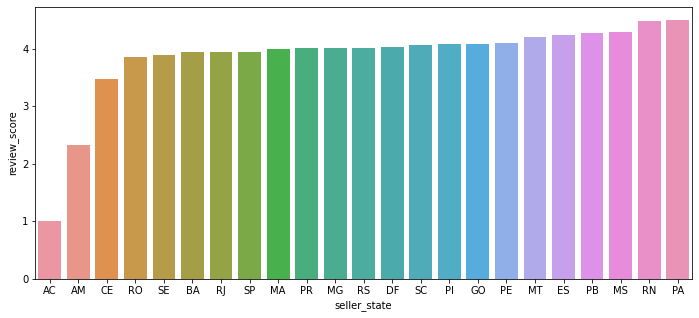

In [ ]:
data = pd.merge(items[['order_id', 'seller_id']], reviews[['order_id', 'review_score']], on='order_id', how='left')
data = data.groupby('seller_id').agg({'review_score': 'mean'}).reset_index()
data = pd.merge(data, sellers[['seller_id', 'seller_state']], on='seller_id', how='left')
data = data.groupby('seller_state').agg({'review_score': 'mean'}).reset_index().sort_values('review_score')

plt.figure(figsize=(40, 5))
plt.subplot(131)
sns.barplot(data=data, x='seller_state', y="review_score")
plt.show()


На основании этого можно сделать вывод, что продавцы почти во всех штатах примерно одного рейтинга. Проседание AC связано с небольшим количеством продавцов в этом штате. Но конечно же есть смысл заказывать в штатах с большим рейтингом - так как они с большей вероятностью гарантирует качественный заказ

## Попугай для ДЗ

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Rose-ringed_parakeet_%28Psittacula_krameri_manillensis%29.jpg/1024px-Rose-ringed_parakeet_%28Psittacula_krameri_manillensis%29.jpg)

А это ожереловый попугай (или индийский кольчатый попугай). Этот вид явно выделяет наличие такого колечка на шее. Самый распространенный попугай в мире

Они очень хорошо и быстро летают, но ходят максимально неуклюже)

В отличии от многих попугаев, для которых человеческая деятельность является вредом и уменьшает их естественный ареал обитания, то как раз для этих птиц человеческая деятельность - это плюс, потому что они находят корм внутри человеческих обществ (не боятся людей, лучше всего приспосабливаются, едят пшеницу). Поговаривают, что в качестве домашних попугаев их держали еще в древней Греции и Риме, а в  средневековой Индии ожереловые попугаи часто были питомцами знатных особ и монархов, причём владение этим попугаем считалось элементом роскоши и престижа